<a href="https://colab.research.google.com/github/jeanfcf/unemployment-forecast-uk/blob/arima-mlp/ARIMA-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ARIMA + MLP ( PYTHON )

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6 
from pmdarima.arima import auto_arima

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')
df = pd.read_csv('/content/drive/MyDrive/Datasets/UK/UK-dataset.csv',parse_dates=['ANO'], index_col='ANO',date_parser=dateparse)
df = df.drop(['CASOS'], 1)
df = df.drop(['MORTES'], 1)
df = df.drop(['GDP'], 1)
df = df.drop(['LIBRA'], 1)
df = df.drop(['INFLACAO'], 1)
df = df.drop(['BANKRATE'], 1)
df.head()

,DESEMPREGO
ANO,
1997-01-01,7.5
1997-02-01,7.3
1997-03-01,7.2
1997-04-01,7.2
1997-05-01,7.2


In [ ]:
model = auto_arima(df,m=12,trace=3,error_action='ignore',suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-574.014, Time=2.15 sec
First viable model found (-574.014)
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-507.221, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-548.851, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-532.859, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-506.542, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-571.169, Time=1.45 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-569.829, Time=1.33 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-569.198, Time=4.95 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-570.184, Time=4.50 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-565.781, Time=0.83 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-571.728, Time=3.48 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-569.887, Time=5.13 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-569.981, Time=5.59 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-576.04

In [ ]:
train = df.loc['1997-01-01':'2016-12-01']
test = df.loc['2017-01-01':]

In [ ]:
model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
forecast = model.predict(n_periods=51)

In [ ]:
future = pd.DataFrame(forecast,index=test.index,columns=['#DESEMPREGO'])

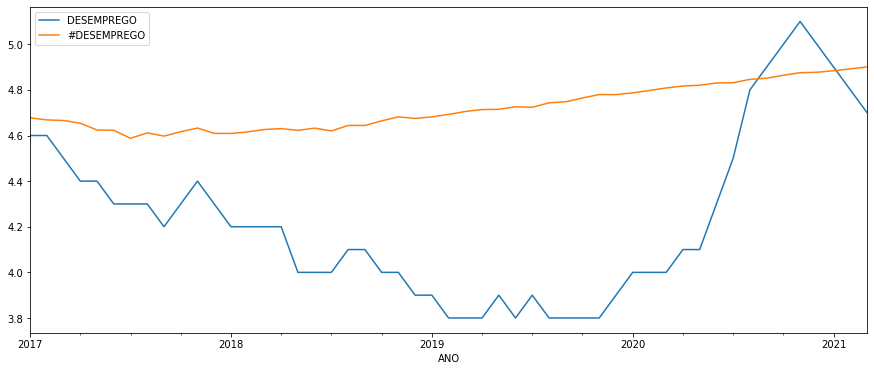

In [ ]:
pd.concat([test,future],axis=1).plot()

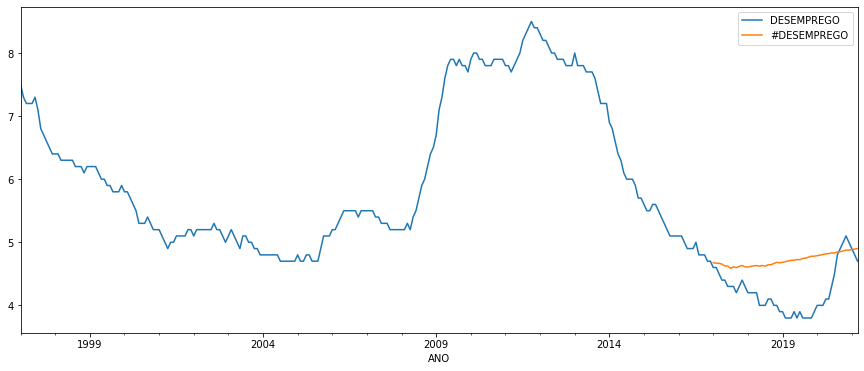

In [ ]:
pd.concat([df,future],axis=1).plot()

In [ ]:
residuo = pd.DataFrame(test.DESEMPREGO - future['#DESEMPREGO'] , columns=['residuos'])
residuo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2017-01-01 to 2021-03-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   residuos  51 non-null     float64
dtypes: float64(1)
memory usage: 3.3 KB


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import math
import math
import matplotlib
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import concat
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

In [ ]:
X = np.array(test)
y = np.array(residuo)

In [ ]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=False)

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

In [ ]:
mlpr = MLPRegressor(max_iter=7000)

param_list = {"hidden_layer_sizes": [(1,),(50,)], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list,cv=tscv)

In [ ]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=MLPRegressor(max_iter=7000),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(1,), (50,)],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
y_true, y_pred = y_validate , gridCV.predict(X_validate)

In [ ]:
y_pred = y_pred.reshape(-1,1)

MAE 0.12356051422222962
MSE: 0.01910526386160025
RMSE: 0.138221792281826
MAPE: 0.9114343053894585
R-Squared: 0.8750505917543355


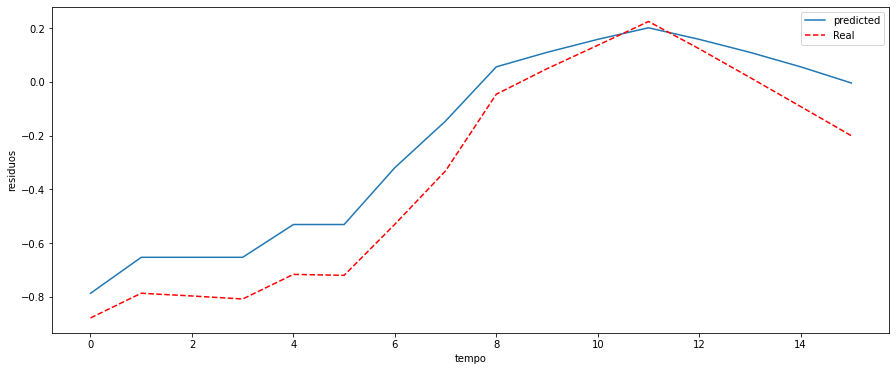

<Figure size 864x432 with 0 Axes>

In [ ]:
mse = mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = mean_absolute_percentage_error(y_true,y_pred)
r2 = metrics.r2_score(y_true,y_pred)
print("MAE", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-Squared:", r2)
plt.plot(y_pred, '-', label="predicted")
plt.plot(y_true, '--', color='red', label="Real")
plt.legend(loc='upper right')
plt.xlabel("tempo")
plt.ylabel("residuos")
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
predicao = future['#DESEMPREGO']

In [ ]:
tamanho = math.floor(len(predicao)*0.7)

In [ ]:
predicao = predicao[tamanho:]

In [ ]:
real = test.DESEMPREGO[tamanho:]

In [ ]:
predicao = np.array(predicao)
real = np.array(real)

In [ ]:
predicao = predicao.reshape(-1,1)
real = real.reshape(-1,1)

In [ ]:
preds_mlp = predicao + y_pred

MAE 0.1235605142222296
MSE: 0.019105263861600254
RMSE: 0.138221792281826
MAPE: 0.028423348848311193
R-Squared: 0.8934666184149496


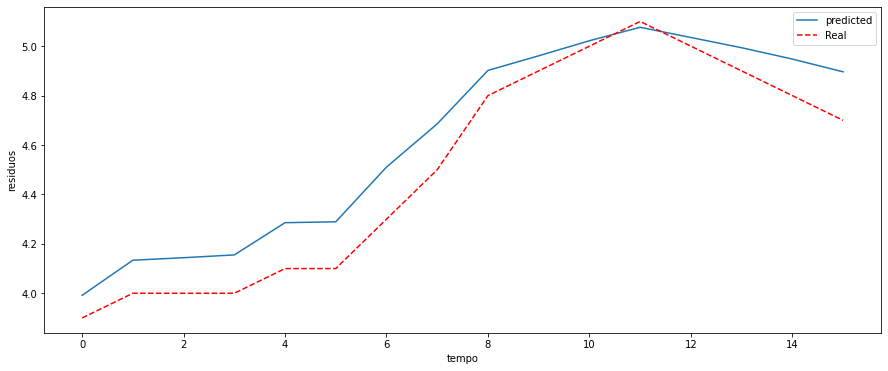

<Figure size 864x432 with 0 Axes>

In [ ]:
mse = mean_squared_error(real,preds_mlp)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(real,preds_mlp)
mape = mean_absolute_percentage_error(real,preds_mlp)
r2 = metrics.r2_score(real,preds_mlp)
print("MAE", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R-Squared:", r2)
plt.plot(preds_mlp, '-', label="predicted")
plt.plot(real, '--', color='red', label="Real")
plt.legend(loc='upper right')
plt.xlabel("tempo")
plt.ylabel("residuos")
plt.figure(figsize=(12, 6))
plt.show()

In [ ]:
t = pd.DataFrame(future['#DESEMPREGO'])

In [ ]:
f = pd.DataFrame(preds_mlp,columns=['preds'])

In [ ]:
t['#DESEMPREGO'][tamanho:] = f.preds

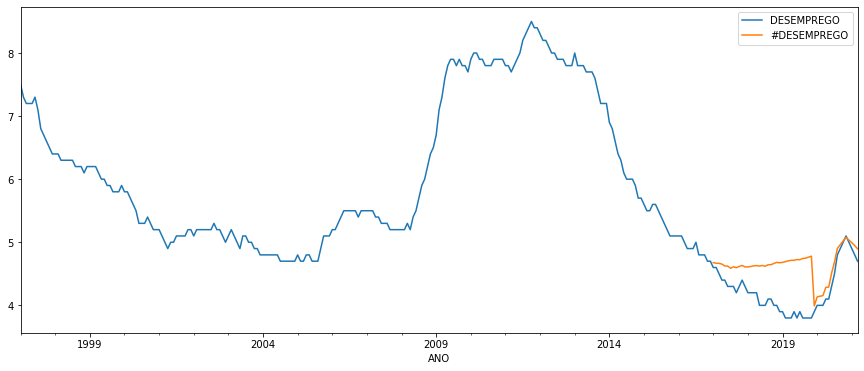

In [ ]:
pd.concat([df,t],axis=1).plot()